In [1]:
using Pkg
Pkg.add("Images")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %==========>                              ]  24.3 %]  48.4 % [==============================>          ]  72.7 % ]  96.8 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [2]:
using Images
using Roots
using ForwardDiff

In [101]:
z(x) = x^3 - 1
dz(x) = 3*x^2
scale = 1000
height_ratio = 2
width_ratio = 2
h = height_ratio * scale
w = width_ratio * scale

2000

In [102]:
tolerance = 0.00001
roots=[complex(1,0), complex(-0.5, sqrt(3)/2), complex(-0.5, -sqrt(3)/2)]


3-element Array{Complex{Float64},1}:
  1.0 + 0.0im               
 -0.5 + 0.8660254037844386im
 -0.5 - 0.8660254037844386im

In [103]:
res = Array{Float64}(undef, h, w)
colors = Array{Int64}(undef, h, w)

2000×2000 Array{Int64,2}:
            109613040  -7854115490554998016  …  -7017170401906086740
      140581756687472     41538452261634195     -7637937189407712512
            109613040  -7595883074752047469        42951324753854614
            105192816  -7637939397021231616     -6917353103096243301
 -8463951954668647798     42386175777177750     -6865252744603631456
 -8502643771156297216  -7595883074752047466  …  -7277645907798286336
    38995281715003530  -7637939397021231616        42951324787540120
 -8463951954668647798     42951324787409046     -7595883074718492520
 -8502643771156297216  -7451204928099280744     -7637939397021231616
    38995281715003530  -7493822001332054016        42386175777177750
 -8463951954668647798     42951324787540120  …  -7812055856865831274
 -8502643771156297216  -7234187708120130664     -7854115490554998016
    38995281715003530  -7277645907798287616        41538452261634195
                    ⋮                        ⋱                      
 -799823

In [104]:
for i = 1:h
    for j = 1:w
        res[i, j] = 0
        c=complex((i-h/2)/scale,(j-w/2)/scale)
        while res[i,j]<360 && abs(c-roots[1])>=tolerance && abs(c-roots[2])>=tolerance && abs(c-roots[3])>=tolerance
           
            res[i,j]+=1
            c -= z(c)/dz(c)
        end
        if abs(c-roots[1])<tolerance
            colors[i,j] = 1
        elseif abs(c-roots[2])<tolerance
            colors[i,j] = 2
        elseif abs(c-roots[2])<tolerance
            colors[i,j] = 3
        else
            colors[i,j]=4
        end
    end
end

In [105]:
colors

2000×2000 Array{Int64,2}:
 4  4  4  4  4  4  4  4  4  4  4  4  4  …  2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4  …  2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4  …  2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4     2  2  2  2  2  2  2  2  2  2  2  2
 4  4  4  4  4  4  4  4  4  4  4  4  4

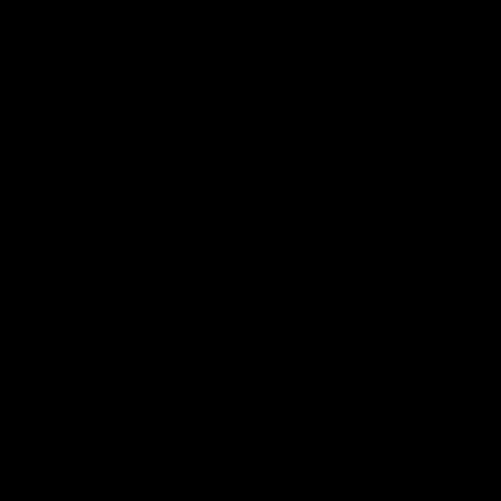

In [106]:
img = Array{RGB{Float64}}(undef, h, w)

In [9]:
Pkg.add("ImageMagick")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [10]:
Pkg.add("FileIO")
using FileIO

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [107]:
m = maximum(res)
for i=1:h
    for j=1:w
        if colors[i, j] == 1
        img[i, j]=RGB{Float64}(res[i,j]/(2*m) + 0.5, res[i,j]/(2*m) + 0.5, 0.0) 
        elseif colors[i, j] ==2 
        img[i, j]=RGB{Float64}(0.0, res[i,j]/(2*m) + 0.5, res[i,j]/(2*m) + 0.5)
        elseif colors[i, j] ==4 
        img[i, j]=RGB{Float64}(res[i,j]/(2*m) + 0.5, 0.0, res[i,j]/(2*m) + 0.5)
        else
        img[i, j]=RGB{Float64}(0.0, 0.0, 0.0)
        end
    end
end


In [108]:
maximum(img[3])

In [109]:
save("img/NFcolors2.bmp", img)